# Background Info

ID: Represents a unique identification of an entry

Customer_ID: Represents a unique identification of a person

Name: Represents the name of a person

Month: Represents the month of the year

Age: Represents the age of the person

SSN: Represents the social security number of a person

Occupation: Represents the occupation of the person

Annual_Income: Represents the annual income of the person

Monthly_Base_Salary: Represents the monthly base salary of a person

Num_Bank_Accounts: Represents the number of bank accounts a person holds

Num_Credit_Card: Represents the number of other credit cards held by a person

Interest_Rate: Represents the interest rate on credit card

Num_of_Loan: Represents the number of loans taken from the bank

Type_of_Loan: Represents the types of loan taken by a person

Delay_from_due_date: Represents the average number of days delayed from the payment date

Num_of_delayed_Payment: Represents the average number of payments delayed by a person

Changed_Credit_Limit: Represents the percentage change in credit card limit

Num_Credit_Inquiries: Represents the number of credit card inquiries

Credit_Mix: Represents the classification of the mix of credits

Outstanding_Debt: Represents the remaining debt to be paid (in USD)

Credit_Utilization_Ratio: Represents the utilization ratio of credit card

Credit_History_Age: Represents the age of credit history of the person

Payment_of_Min_Amount: Represents whether only the minimum amount was paid by the person

Total_EMI_per_month: Represents the monthly EMI payments (in USD)

Amount_invested_monthly: Represents the monthly amount invested by the customer (in USD)

Payment_Behaviour: Represents the payment behavior of the customer (in USD)

Monthly_Balance: Represents the monthly balance amount of the customer (in USD)

Credit_Score: Represents the bracket of credit score (Poor, Standard, Good)

# Packages and read in data

In [45]:
# pip install missingno

In [46]:
##import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from scipy import stats
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OneHotEncoder


In [47]:
#Due to some columns contain more than one data type, there is a warning message, just ignore it
df = pd.read_csv(r"C:\Users\Licht Cai\Desktop\CU\5243\dataset\train.csv")

C:\Users\Licht Cai\anaconda3\envs\tf2\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [48]:
pd.set_option('display.max_columns', None)
df.iloc[:10,:]
df.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,4,9.27,4.0,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.43017233,!@9#%8,340.4792118,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,8_,11.27,4.0,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674,Low_spent_Small_value_payments,244.5653167,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,6,11.27,4.0,Good,809.98,23.933795,NaN,No,49.574949,24.78521651,High_spent_Medium_value_payments,358.1241676,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,4,5.42,2.0,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.2918252,Low_spent_Small_value_payments,470.6906269,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,7,1,7.42,2.0,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123783,High_spent_Large_value_payments,484.5912143,Good


In [49]:
display(df.describe(exclude=np.number).T)
#to see non-numeric columns remain in the dataframe
df.describe()

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633330,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [50]:
df['ID'].count(), df['Name'].count(), df['Name'].isna().sum()
# The difference between count and unique is num of NA in the column
# We also find that there are outliers. Next step, we will first drop NA and remove outliers.

(100000, 90015, 9985)

In [51]:
df1=df.copy() #df1, we are going to change all values into null, and replace it

In [52]:
#first we deal with strange value in categorical columns
categorical_cols = [c for c in df.columns if df[c].dtype == 'object']
for i in categorical_cols:
    print(f'Unique Values of {i} is {df[i].unique()}')

Unique Values of ID is ['0x1602' '0x1603' '0x1604' ... '0x25feb' '0x25fec' '0x25fed']
Unique Values of Customer_ID is ['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' ... 'CUS_0xaf61' 'CUS_0x8600'
 'CUS_0x942c']
Unique Values of Month is ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']
Unique Values of Name is ['Aaron Maashoh' nan 'Rick Rothackerj' ... 'Chris Wickhamm'
 'Sarah McBridec' 'Nicks']
Unique Values of Age is ['23' '-500' '28_' ... '4808_' '2263' '1342']
Unique Values of SSN is ['821-00-0265' '#F%$D@*&8' '004-07-5839' ... '133-16-7738' '031-35-0942'
 '078-73-5990']
Unique Values of Occupation is ['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']
Unique Values of Annual_Income is ['19114.12' '34847.84' '34847.84_' ... '20002.88' '39628.99' '39628.99_']
Unique Values of Num_of_Loan is ['4' '1' '3' '967' '-100' '0' '0_' '2' '3_' '2_' '7

In [53]:
#there are many numeric value followed by '_', let's remove it
for i in categorical_cols:
    df1[i] = df1[i].str.strip('_')
    df1[i] = df1[i].replace({'':np.nan})
    try:
        df1[i] = df1[i].astype('float64')
    except:
        df1[i] = df1[i]
        
for col in categorical_cols:
    df1[col] = df1[col].replace({'!@9#%8':np.nan, '#F%$D@*&8':np.nan})

In [54]:
display(df1.describe(exclude=np.number).T)
#to recheck non-numeric columns remain in the dataframe
#strange value is cleaned and seems successful
#as reminder, Credit_History_Age can change into float by re

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
SSN,94428,12500,078-73-5990,8
Occupation,92938,15,Lawyer,6575
Type_of_Loan,88592,6260,Not Specified,1408
Credit_Mix,79805,3,Standard,36479
Credit_History_Age,90970,404,15 Years and 11 Months,446
Payment_of_Min_Amount,100000,3,Yes,52326


In [55]:
#Recall from describe, after we deal with strange values in categorical columns, outliers in numerical columns are next target
#to prevent data loss, we want outliers to be replaced by same value from same users
dict1 = pd.Series(df1['Num_Bank_Accounts'].values,index=df1['ID']).to_dict()
#However, dictionary is not the possible solution. There are 1315 users who own bank accounts over 11
df['Num_Bank_Accounts'].quantile(.95) # =10

a  = 0
for i in dict1.values():
    if i>11:
        a = a+1
a

1315

(445.00999999999476, 10.0)

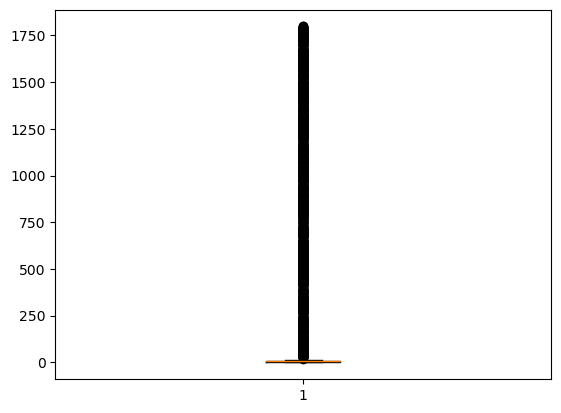

In [56]:
plt.boxplot(df1['Num_Bank_Accounts'])
df1['Num_Bank_Accounts'].quantile(.99), df1['Num_Bank_Accounts'].quantile(.95)

In [57]:
#We replace outlier to nas
numerical_cols = [col for col in df1.columns if (df1[col].dtype == 'int64') | (df1[col].dtype == 'float64')]

for x in list(numerical_cols):
    q_low = df1[x].quantile(0.05)
    q_hi  = df1[x].quantile(0.95)

    df1.loc[df1[x] < q_low,x] = np.nan
    df1.loc[df1[x] > q_hi,x] = np.nan


<AxesSubplot:>

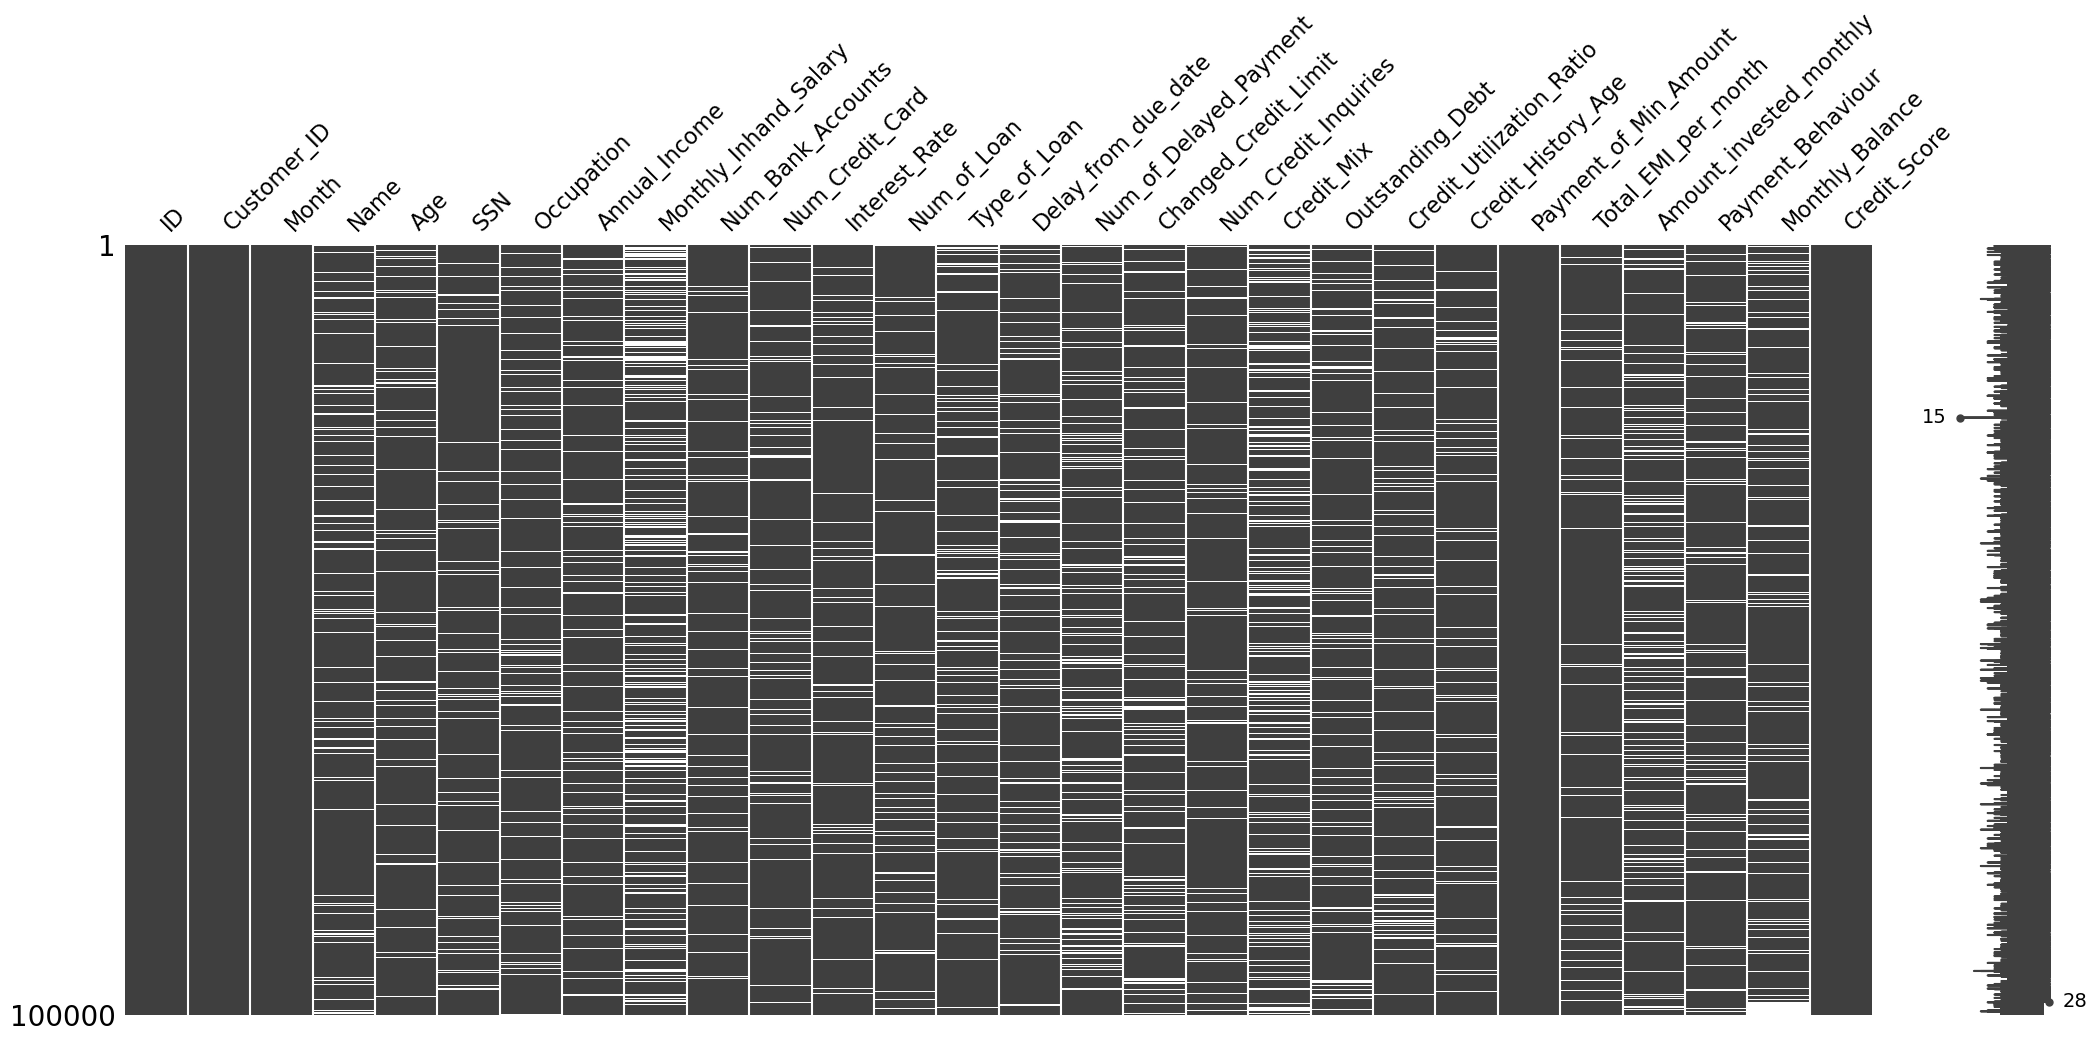

In [58]:
#NA can see in graph as white line
msno.matrix(df1)

In [59]:
#as a short intermediate summary for data cleaning, let's see number of nas in each columns 
miss =df1.isnull().sum()
miss =miss[miss>0]
miss
#you can see, if we just drop all outlier rows, we will loose a lot of informations
#thus, we choose to replace value instead of drop it
#instead of drop the row, replace the outlier from upper row or median are better choices

Name                         9985
Age                          8569
SSN                          5572
Occupation                   7062
Annual_Income                9991
Monthly_Inhand_Salary       23500
Num_Bank_Accounts            5673
Num_Credit_Card              6601
Interest_Rate                6219
Num_of_Loan                  8050
Type_of_Loan                11408
Delay_from_due_date          9016
Num_of_Delayed_Payment      13995
Changed_Credit_Limit        11813
Num_Credit_Inquiries         6202
Credit_Mix                  20195
Outstanding_Debt            10000
Credit_Utilization_Ratio    10000
Credit_History_Age           9030
Total_EMI_per_month          4998
Amount_invested_monthly     14031
Payment_Behaviour            7600
Monthly_Balance             12582
dtype: int64

In [60]:
#we can replace nan based on same consumter ID
#display the first 10 rows, we can find
#ID is representation of unique row, but cannot be representation of unique costumer, we drop it
# we decide to drop Type_of_Loan, due to complexity
df1.drop(columns=['ID','Name','SSN','Type_of_Loan'], axis=1, inplace=True)
df1.head(10)
#Among first eight records, they come from same person.
#Nans in Monthly_Inhand_Salary of first person can be replaced

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,CUS_0xd40,February,23.0,Scientist,19114.12,NaN,3.0,4.0,3.0,4.0,NaN,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629163,Good
2,CUS_0xd40,March,NaN,Scientist,19114.12,NaN,3.0,4.0,3.0,4.0,3.0,7.0,NaN,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,CUS_0xd40,April,23.0,Scientist,19114.12,NaN,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,CUS_0xd40,May,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
5,CUS_0xd40,June,23.0,Scientist,19114.12,NaN,3.0,4.0,3.0,4.0,8.0,4.0,9.27,4.0,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172,NaN,340.479212,Good
6,CUS_0xd40,July,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,8.0,11.27,4.0,Good,809.98,NaN,22 Years and 7 Months,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good
7,CUS_0xd40,August,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,6.0,11.27,4.0,Good,809.98,NaN,NaN,No,49.574949,NaN,High_spent_Medium_value_payments,358.124168,Standard
8,CUS_0x21b1,January,28.0,NaN,34847.84,3037.986667,2.0,4.0,6.0,1.0,3.0,4.0,5.42,2.0,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,Standard
9,CUS_0x21b1,February,28.0,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1.0,7.0,NaN,7.42,2.0,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good


In [61]:
#we cand fill in based on same Customer_ID, it's also unique, means this person always have same Monthly_Inhand_Salary
numerical_df1 = {col for col in df1.columns if (df1[col].dtype=='int64') | (df1[col].dtype=='float64')}
categorical_df1 = {col for col in df1.columns if (df1[col].dtype=='object')}
                      
unique_based = [col for col in numerical_df1 if df1[col].head(8).nunique() == 1] #fill by back
df1[unique_based] = df1[unique_based].fillna(method='bfill')
for col in unique_based:
    df1[col]=df1[col].fillna(method='bfill')

non_unique_based = [col for col in numerical_df1 if df1[col].head(8).nunique() != 1] #fill by median
df1[non_unique_based] = df1.groupby(by=['Customer_ID'])[non_unique_based].transform('median')
for col in non_unique_based:
    df1[col]=df1.groupby(by=['Customer_ID'])[col].transform('median')

In [62]:
#do same fill by back for categorical columns
#notice this time "Credit_History_Age" is skipped
missing_cols = {col for col in miss.index}
categorical_miss=[col for col in categorical_df1.intersection(missing_cols)]
categorical_miss=['Payment_Behaviour','Credit_Mix','Occupation']
df1[categorical_miss] = df1[categorical_miss].fillna(method='bfill')
df1[categorical_miss] = df1[categorical_miss].fillna(method='ffill')

In [63]:
#as summary to df1, compare to original df, we drop four columns 'ID','Name','SSN','Type_of_Loan'
df_2 = df1.copy()
df_2.shape 

(100000, 24)

In [64]:
df_2.isna().sum()

Customer_ID                    0
Month                          0
Age                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Delay_from_due_date         4640
Num_of_Delayed_Payment      1792
Changed_Credit_Limit        4456
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          9030
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly       24
Payment_Behaviour              0
Monthly_Balance             1936
Credit_Score                   0
dtype: int64

<AxesSubplot:>

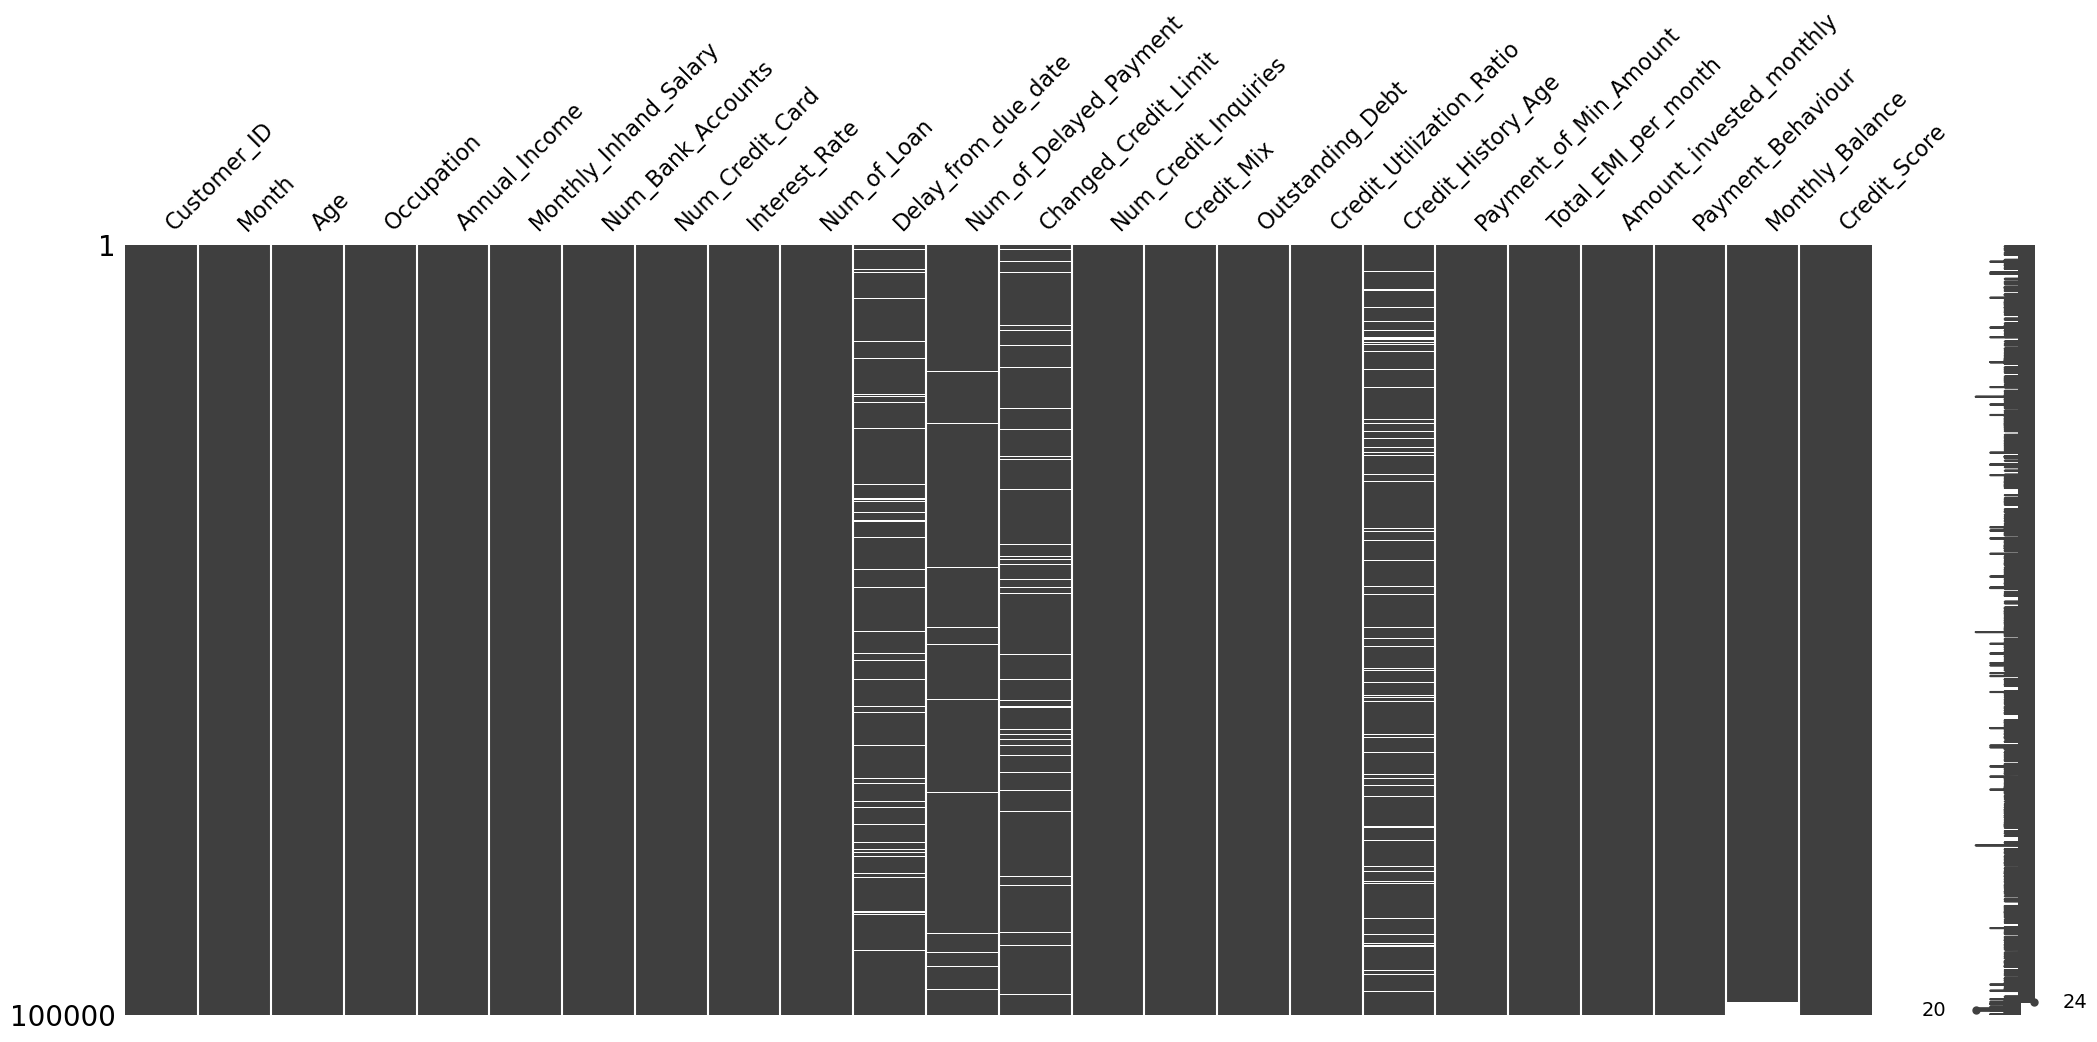

In [65]:
msno.matrix(df_2)

In [66]:
#as summary to df2, compare to df1, we drop all strange value(now na) in those numerical columns
df_c=df_2.dropna() 
df_c.shape

(80102, 24)

In [67]:
df_c.isna().sum()
df_c.dropna()
df_c['Credit_Mix'].value_counts()

Standard    40100
Good        24067
Bad         15935
Name: Credit_Mix, dtype: int64

In [68]:
#Next steps, we are transform text columns
#replace with order numbers
df_clean=df_c.copy()
df_clean['Credit_Score'] = df_clean['Credit_Score'].map({'Poor':1, 'Standard':2, 'Good':3})

In [69]:
#Transfrom Month to float
df_clean['Month'] = df_clean['Month'].map({'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 
                                           'June':6, 'July':7, 'August':8, 'September':9, 'October':10,
                                            'November':11, 'December':12})

In [70]:
df_clean['Credit_Mix'].value_counts()

Standard    40100
Good        24067
Bad         15935
Name: Credit_Mix, dtype: int64

In [71]:
df_clean['Payment_of_Min_Amount'] = df_clean['Payment_of_Min_Amount'].map({'No':0,'Yes':1,'NM':0})
df_clean['Credit_Mix'] = df_clean['Credit_Mix'].map({'Bad':0,'Standard':1,'Good':2})

In [72]:
df_clean.isna().sum()
df_clean

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,6.5,11.27,4.0,2,809.98,27.935805,22 Years and 1 Months,0,49.574949,81.699521,High_spent_Small_value_payments,321.851976,3
2,CUS_0xd40,3,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,6.5,11.27,4.0,2,809.98,27.935805,22 Years and 3 Months,0,49.574949,81.699521,Low_spent_Medium_value_payments,321.851976,3
3,CUS_0xd40,4,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,6.5,11.27,4.0,2,809.98,27.935805,22 Years and 4 Months,0,49.574949,81.699521,Low_spent_Small_value_payments,321.851976,3
4,CUS_0xd40,5,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,6.5,11.27,4.0,2,809.98,27.935805,22 Years and 5 Months,0,49.574949,81.699521,High_spent_Medium_value_payments,321.851976,3
5,CUS_0xd40,6,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,6.5,11.27,4.0,2,809.98,27.935805,22 Years and 6 Months,0,49.574949,81.699521,Low_spent_Small_value_payments,321.851976,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98298,CUS_0x9d41,3,38.0,Lawyer,41015.55,3152.962500,7.0,4.0,4.0,1.0,9.0,3.0,1.58,2.0,2,599.40,31.412674,25 Years and 1 Months,0,25.671257,212.095674,Low_spent_Small_value_payments,337.529319,2
98299,CUS_0x9d41,4,38.0,Lawyer,41015.55,3152.962500,7.0,4.0,4.0,1.0,9.0,3.0,1.58,2.0,2,599.40,31.412674,25 Years and 2 Months,0,25.671257,212.095674,Low_spent_Small_value_payments,337.529319,2
98300,CUS_0x9d41,5,38.0,Lawyer,41015.55,3152.962500,7.0,4.0,4.0,1.0,9.0,3.0,1.58,2.0,2,599.40,31.412674,25 Years and 3 Months,0,25.671257,212.095674,High_spent_Large_value_payments,337.529319,2
98302,CUS_0x9d41,7,38.0,Lawyer,41015.55,3152.962500,7.0,4.0,4.0,1.0,9.0,3.0,1.58,2.0,2,599.40,31.412674,25 Years and 5 Months,0,25.671257,212.095674,High_spent_Small_value_payments,337.529319,2


In [73]:
#Transform the Credit_History_Age to float in unit of years
df_clean['Credit_History_Age'] = df_clean['Credit_History_Age'].astype(str).str.replace(' Years and ','.')
df_clean['Credit_History_Age'] = df_clean['Credit_History_Age'].astype(str).str.replace('Months','')
df_clean.head()

def ym(x):
    Y=float(x.split('.')[0])
    M=float(x.split('.')[1])
    return round(Y+M/12, 2)
df_clean.Credit_History_Age=df_clean.Credit_History_Age.apply(lambda x :ym(x))

In [74]:
df_clean.isna().sum()

Customer_ID                 0
Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [75]:
df_clean.head(10)
df_clean.reset_index(drop=True)

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,6.5,11.27,4.0,2,809.98,27.935805,22.08,0,49.574949,81.699521,High_spent_Small_value_payments,321.851976,3
1,CUS_0xd40,3,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,6.5,11.27,4.0,2,809.98,27.935805,22.25,0,49.574949,81.699521,Low_spent_Medium_value_payments,321.851976,3
2,CUS_0xd40,4,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,6.5,11.27,4.0,2,809.98,27.935805,22.33,0,49.574949,81.699521,Low_spent_Small_value_payments,321.851976,3
3,CUS_0xd40,5,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,6.5,11.27,4.0,2,809.98,27.935805,22.42,0,49.574949,81.699521,High_spent_Medium_value_payments,321.851976,3
4,CUS_0xd40,6,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,6.5,11.27,4.0,2,809.98,27.935805,22.50,0,49.574949,81.699521,Low_spent_Small_value_payments,321.851976,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80097,CUS_0x9d41,3,38.0,Lawyer,41015.55,3152.962500,7.0,4.0,4.0,1.0,9.0,3.0,1.58,2.0,2,599.40,31.412674,25.08,0,25.671257,212.095674,Low_spent_Small_value_payments,337.529319,2
80098,CUS_0x9d41,4,38.0,Lawyer,41015.55,3152.962500,7.0,4.0,4.0,1.0,9.0,3.0,1.58,2.0,2,599.40,31.412674,25.17,0,25.671257,212.095674,Low_spent_Small_value_payments,337.529319,2
80099,CUS_0x9d41,5,38.0,Lawyer,41015.55,3152.962500,7.0,4.0,4.0,1.0,9.0,3.0,1.58,2.0,2,599.40,31.412674,25.25,0,25.671257,212.095674,High_spent_Large_value_payments,337.529319,2
80100,CUS_0x9d41,7,38.0,Lawyer,41015.55,3152.962500,7.0,4.0,4.0,1.0,9.0,3.0,1.58,2.0,2,599.40,31.412674,25.42,0,25.671257,212.095674,High_spent_Small_value_payments,337.529319,2


## Visualization

In [76]:
#Some setups
columns=[col for col in df_clean.columns]
for col in columns:
    print('========================')
    print(df_clean[col].value_counts())

CUS_0xbcdd    8
CUS_0xa163    8
CUS_0x3c90    8
CUS_0x5a77    8
CUS_0x673c    8
             ..
CUS_0x5572    4
CUS_0x982e    4
CUS_0x234a    4
CUS_0x38c0    3
CUS_0x489     3
Name: Customer_ID, Length: 11007, dtype: int64
2    10042
1    10033
6    10017
5    10014
8    10011
3    10006
7    10004
4     9975
Name: Month, dtype: int64
26.0    2603
28.0    2566
38.0    2558
25.0    2555
32.0    2541
31.0    2539
41.0    2521
27.0    2493
19.0    2492
36.0    2490
34.0    2476
29.0    2457
44.0    2438
35.0    2434
22.0    2431
20.0    2378
30.0    2369
37.0    2365
39.0    2361
24.0    2328
21.0    2326
43.0    2323
33.0    2287
45.0    2284
23.0    2272
40.0    2261
42.0    2214
18.0    2059
16.0    1685
46.0    1446
49.0    1273
53.0    1260
17.0    1259
48.0    1252
52.0    1174
51.0    1145
50.0    1118
47.0    1069
Name: Age, dtype: int64
Lawyer           5646
Architect        5520
Scientist        5509
Engineer         5436
Media_Manager    5433
Mechanic         5393
Teacher      

In [77]:
##classify the columns according to number of unique values
col_classified=[]
col_left=[]
for col in columns[1:]:
    if len(df_clean[col].value_counts())<100:
        col_classified.append(col)
    else:
        col_left.append(col)

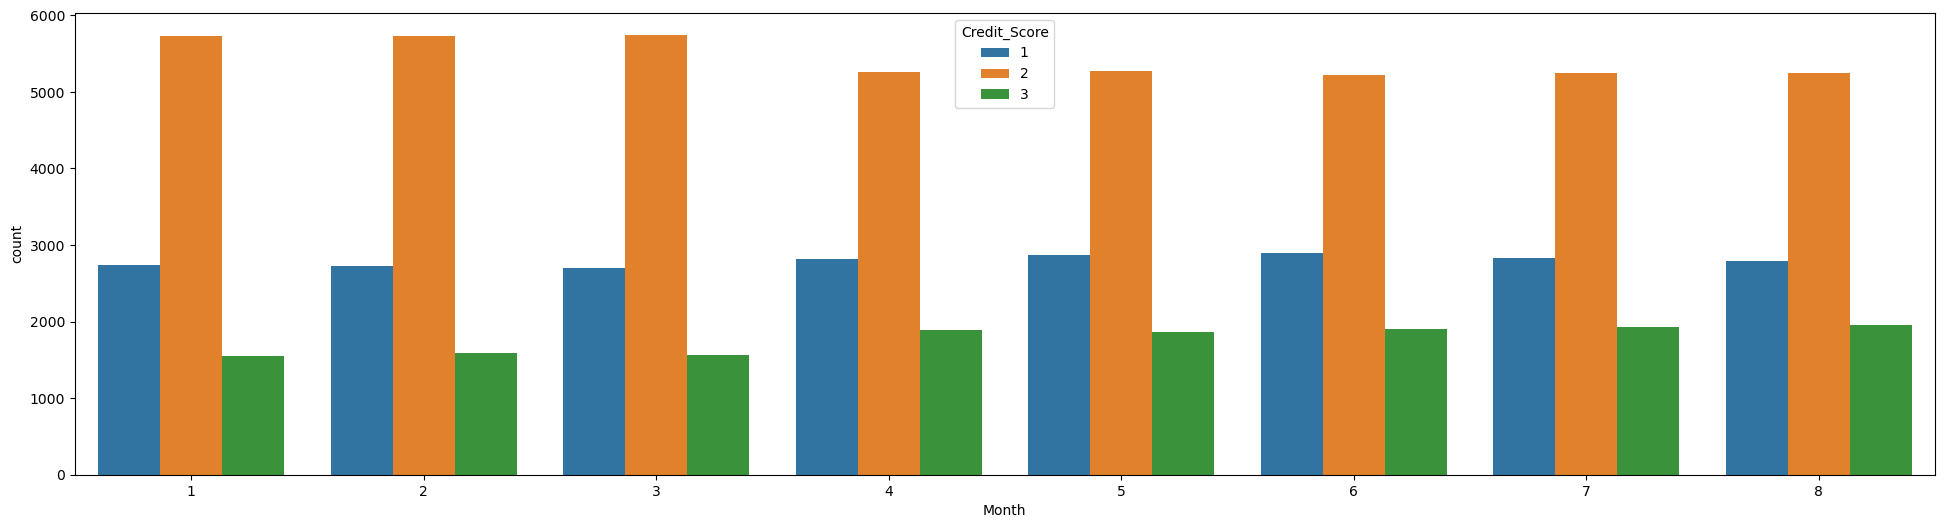

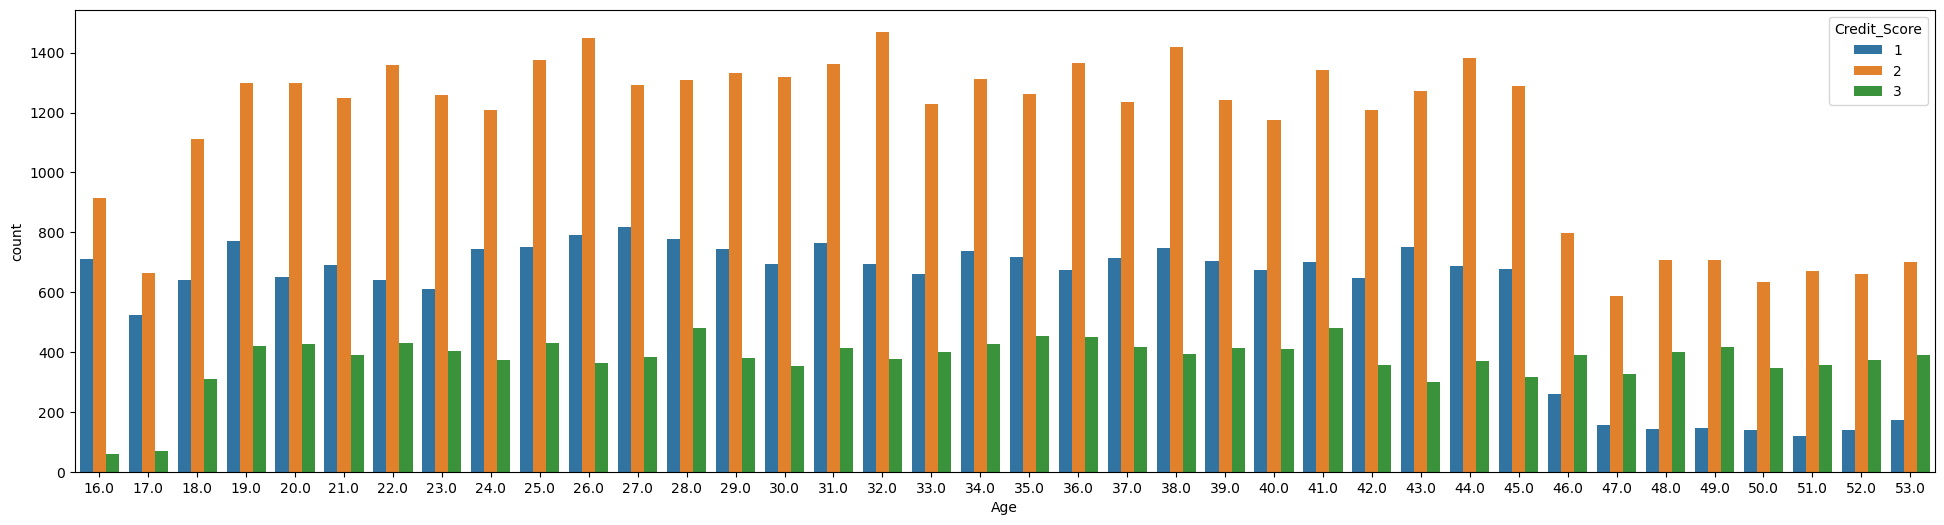

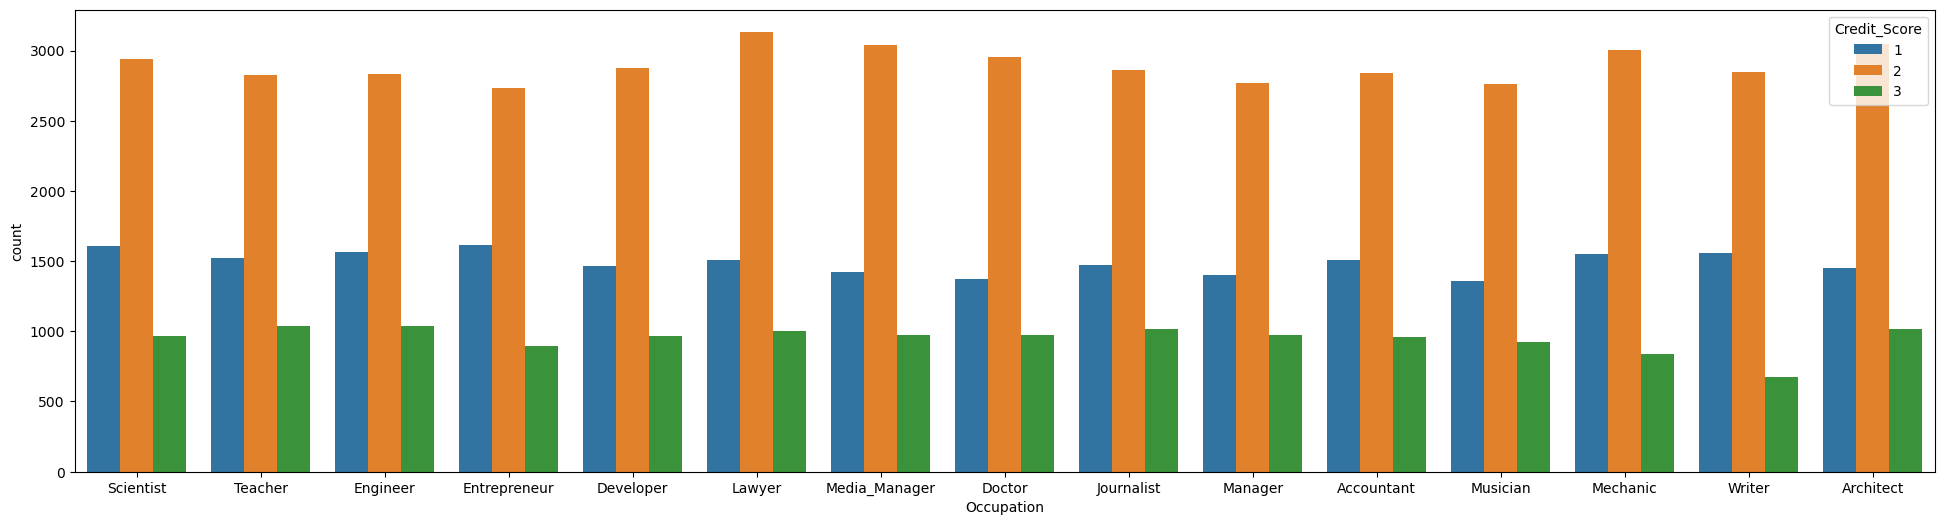

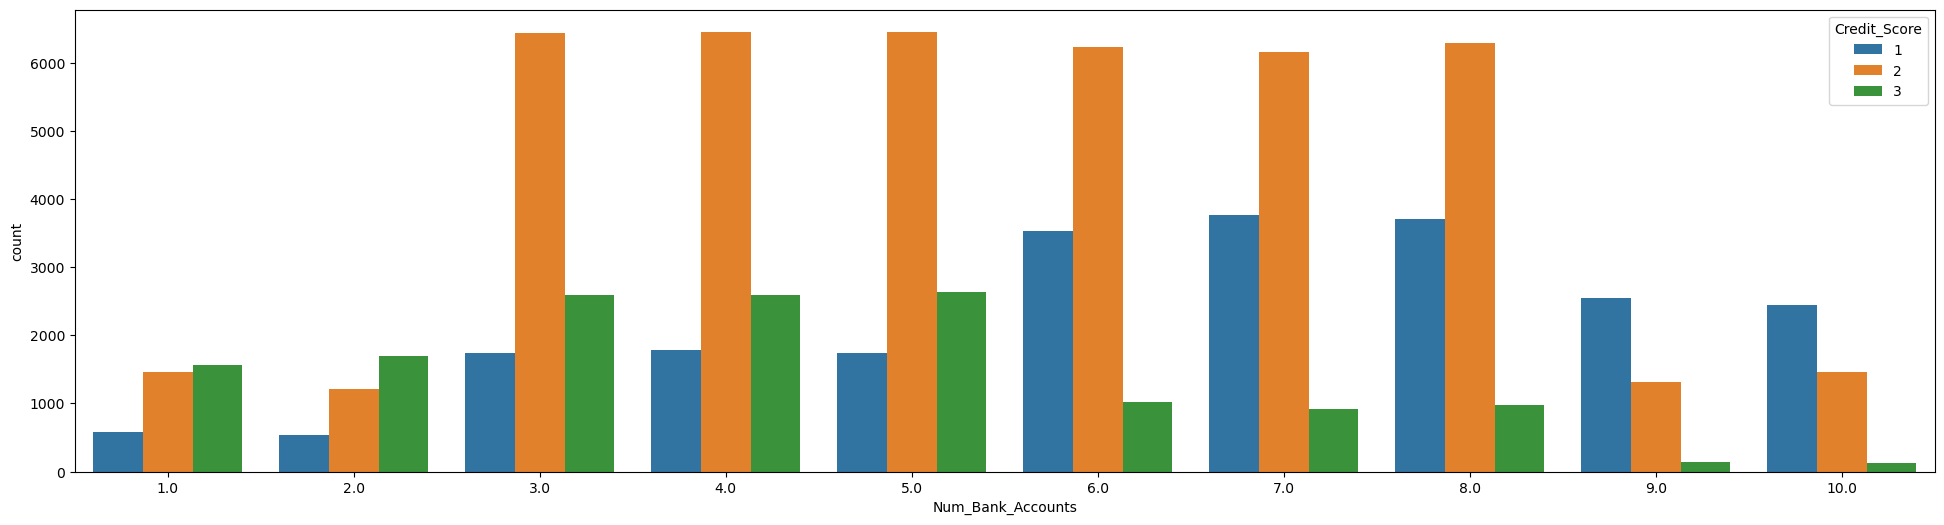

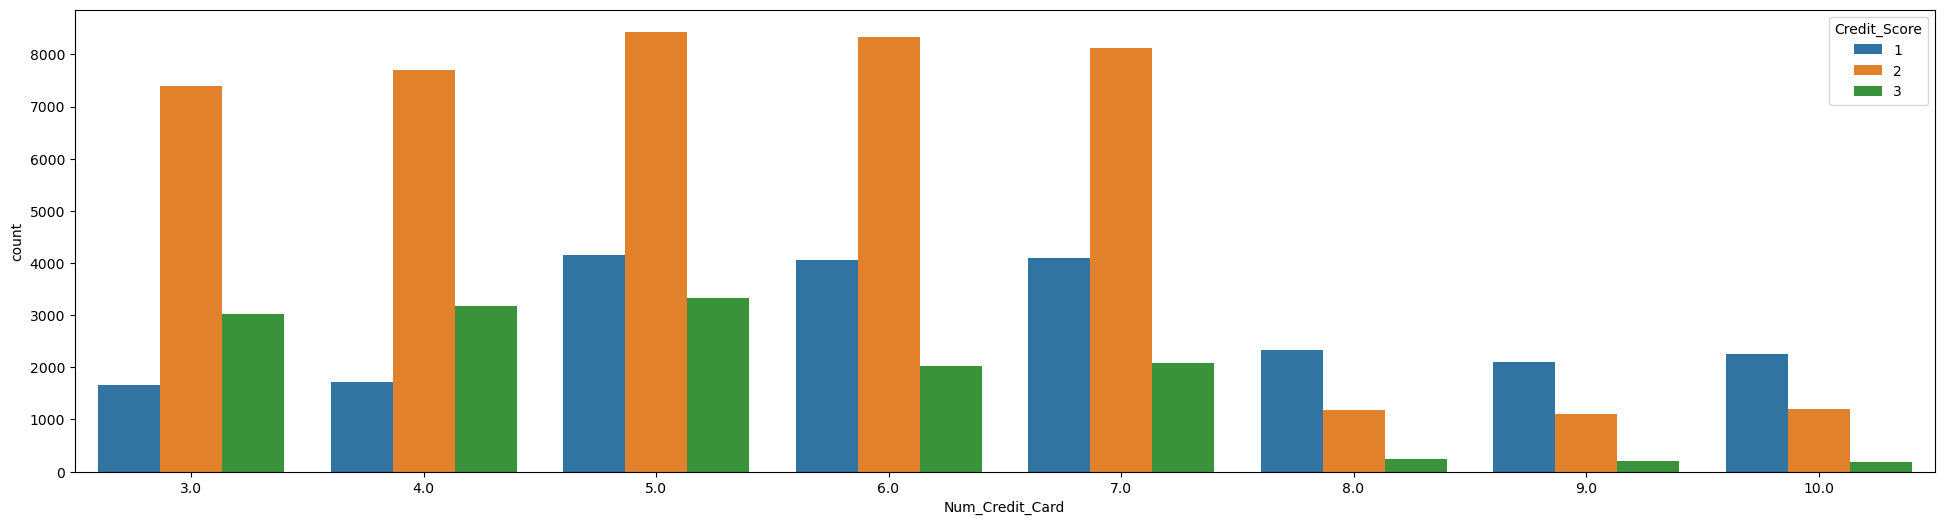

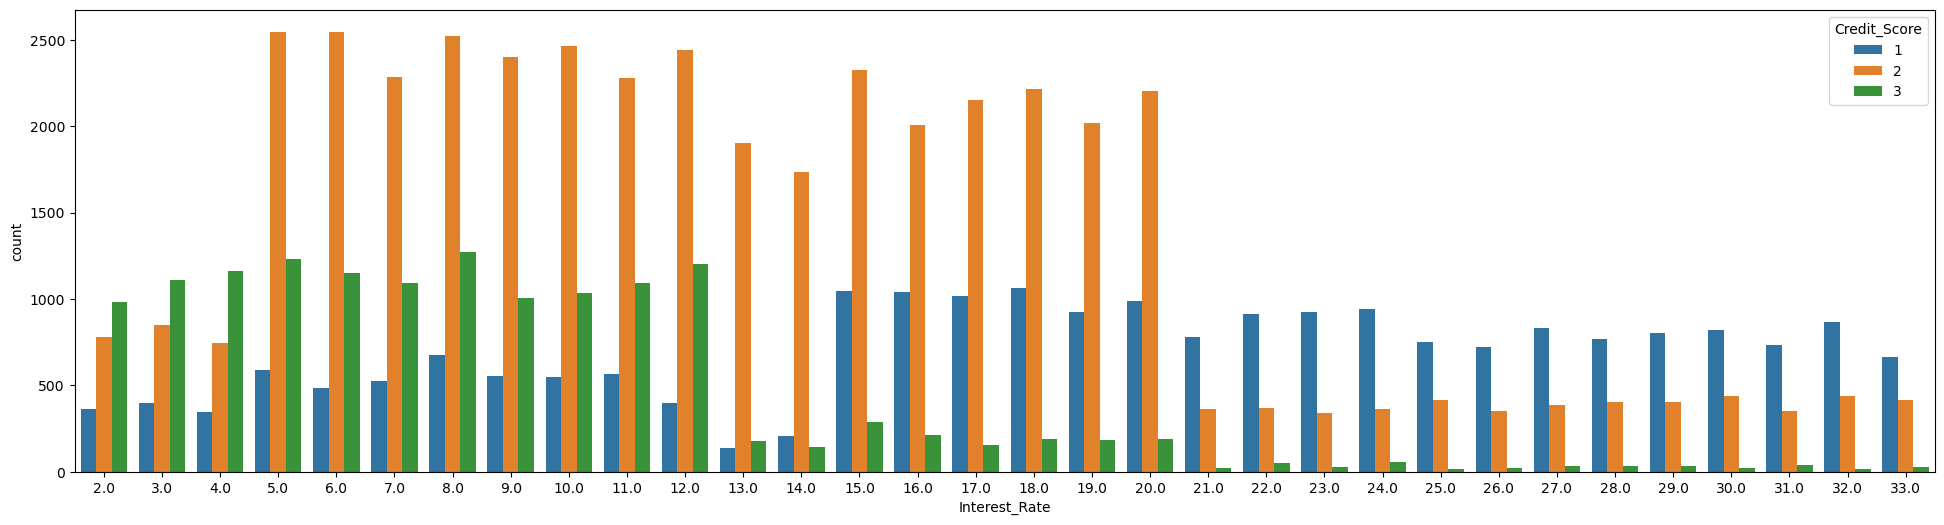

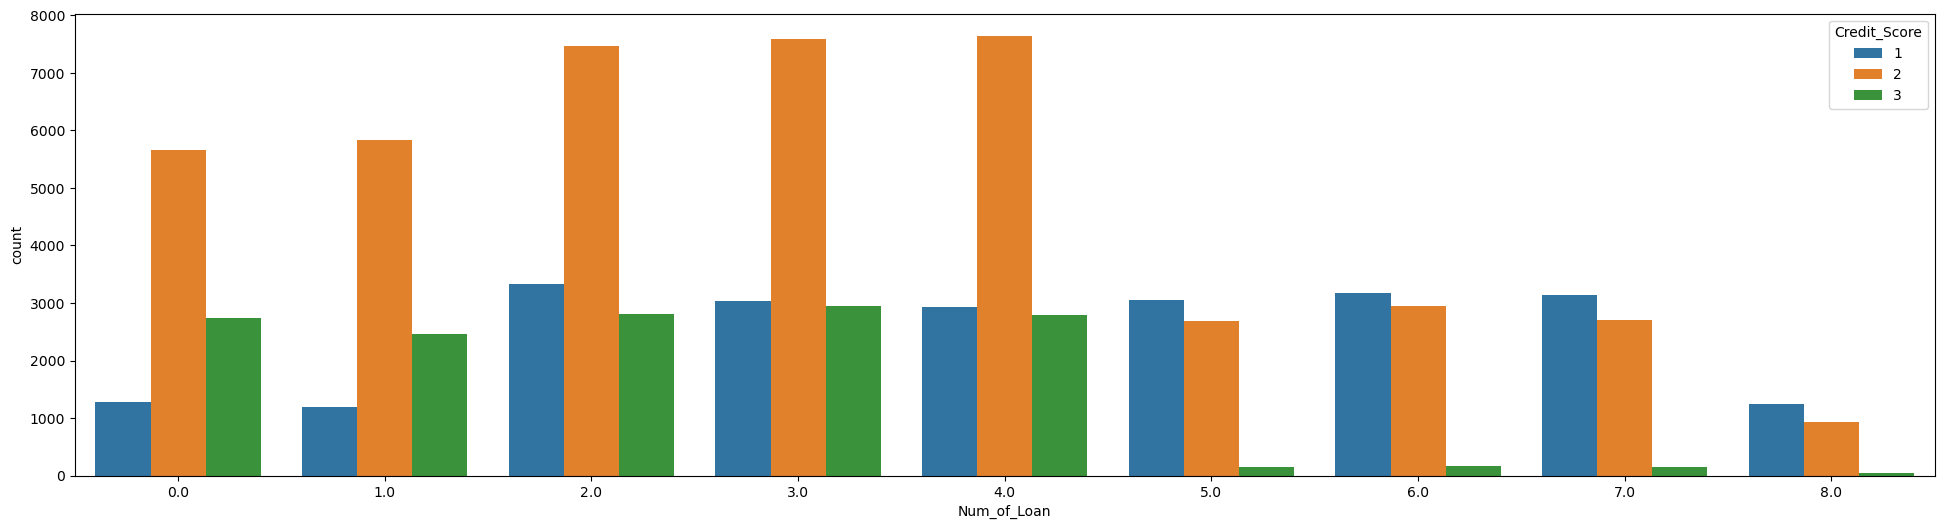

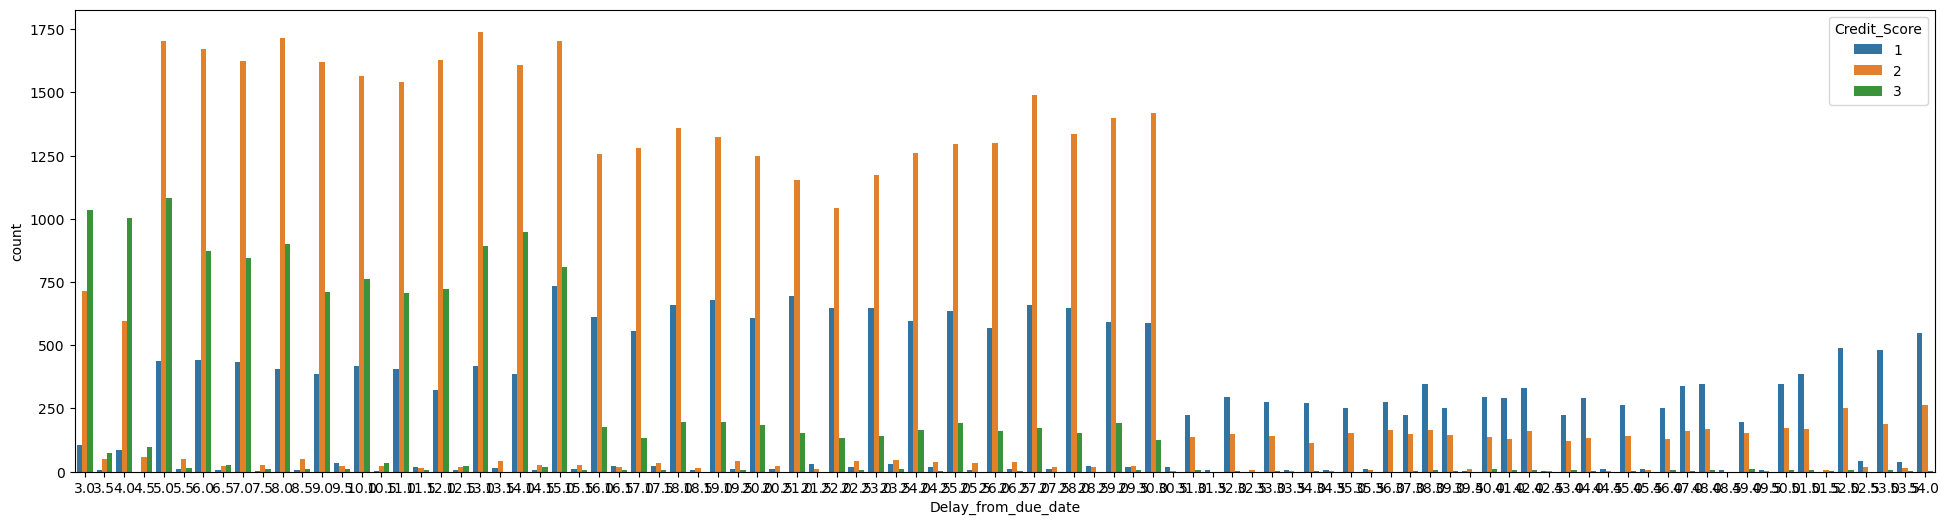

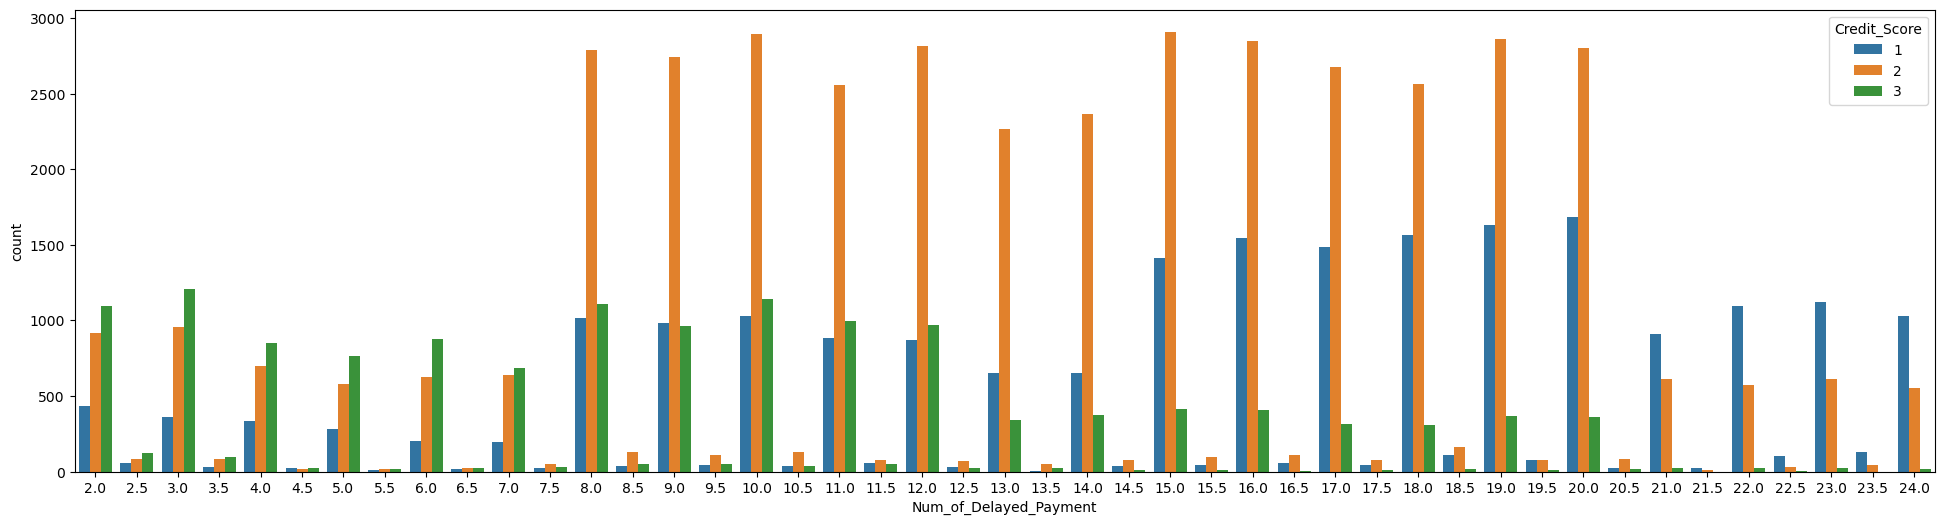

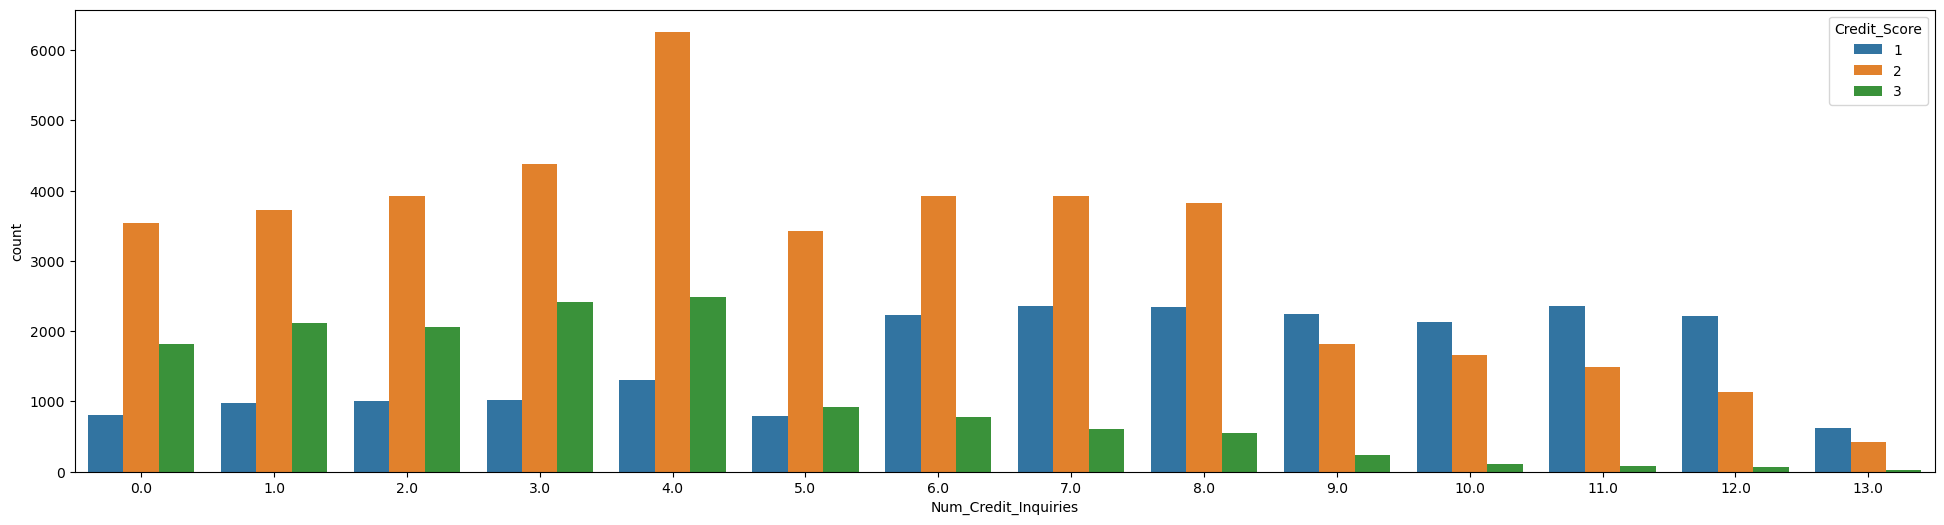

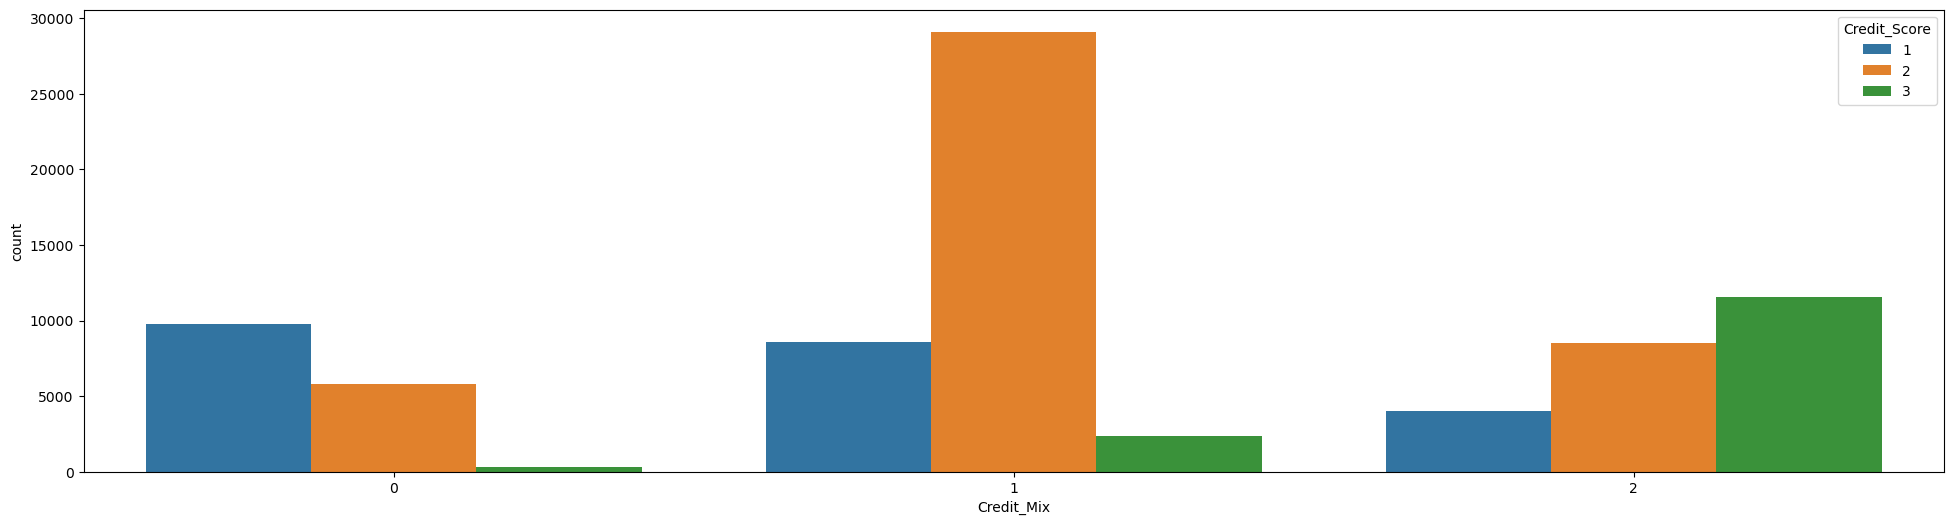

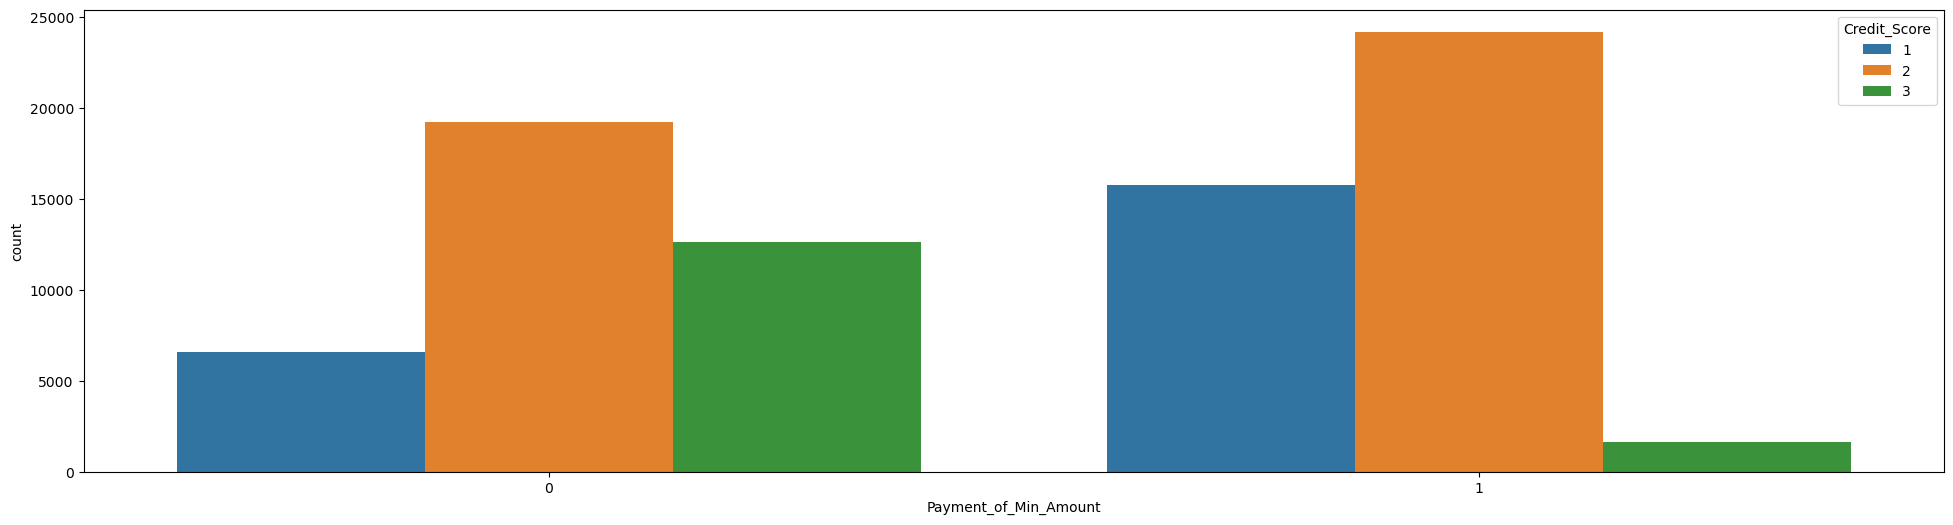

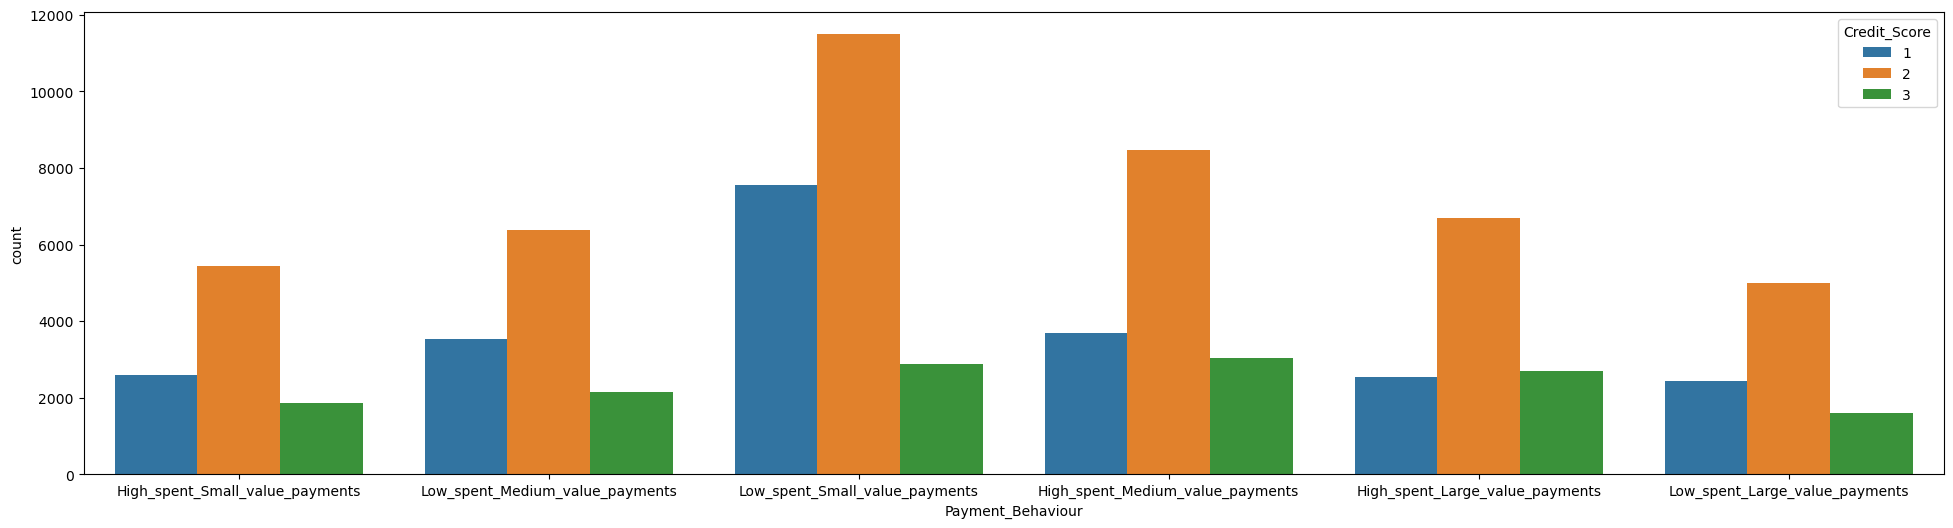

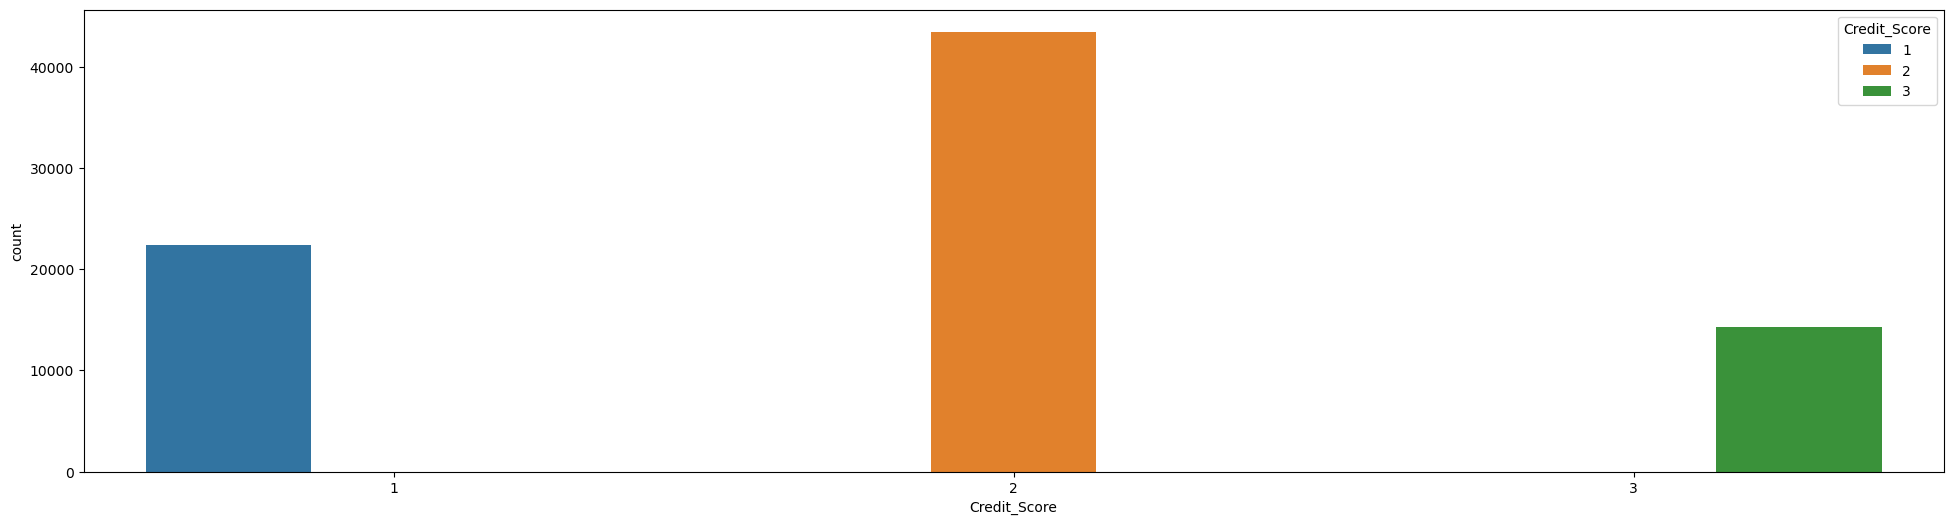

In [78]:
## Simple realtionship between different columns and Credit Scores
#Object Columns

for col in col_classified:
    plt.figure(figsize=(24,6))
    sns.countplot(x=col,data=df_clean, hue="Credit_Score")
    plt.show()

<Figure size 3000x600 with 0 Axes>

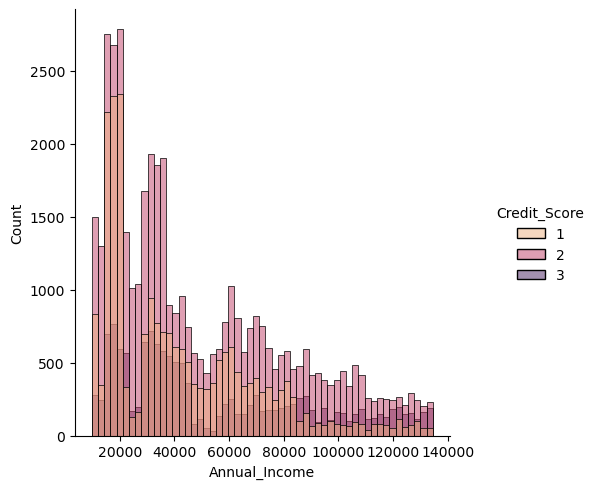

<Figure size 3000x600 with 0 Axes>

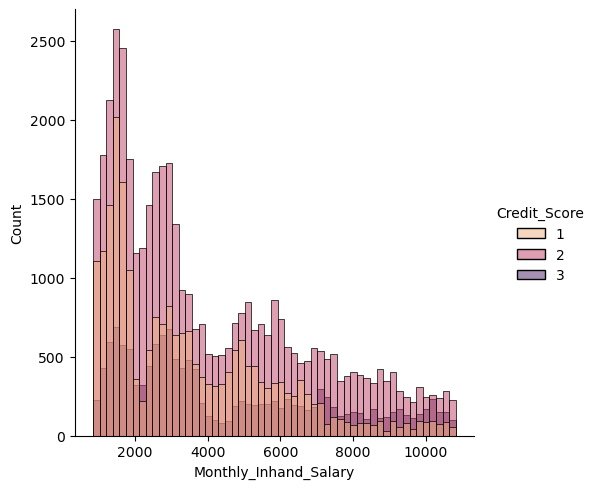

<Figure size 3000x600 with 0 Axes>

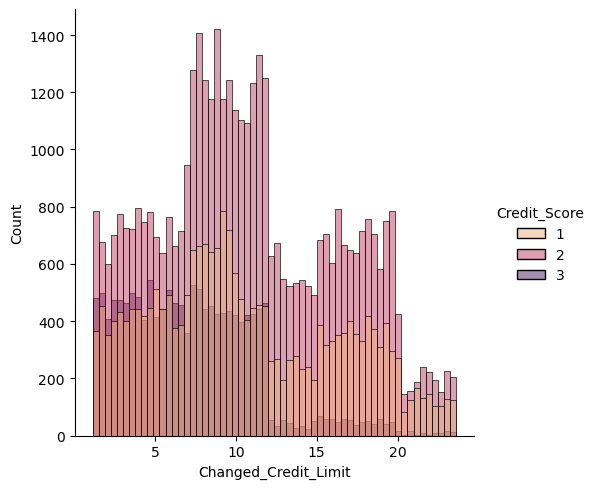

<Figure size 3000x600 with 0 Axes>

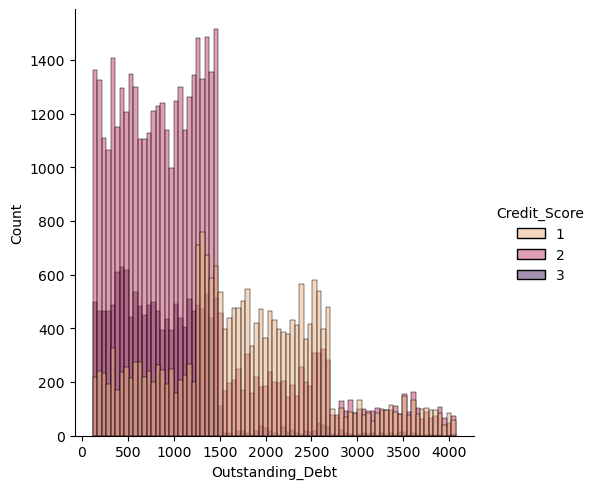

<Figure size 3000x600 with 0 Axes>

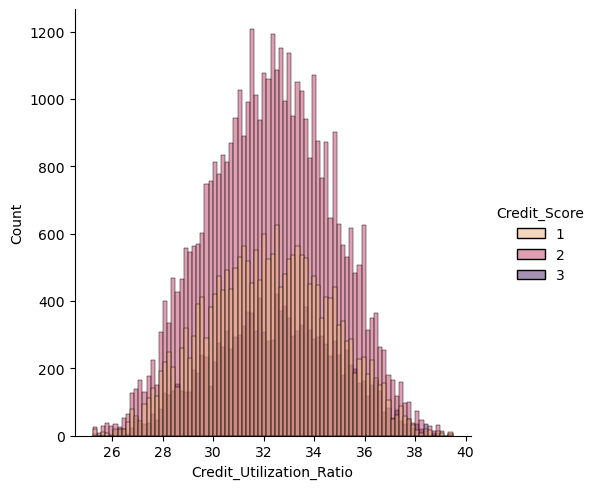

<Figure size 3000x600 with 0 Axes>

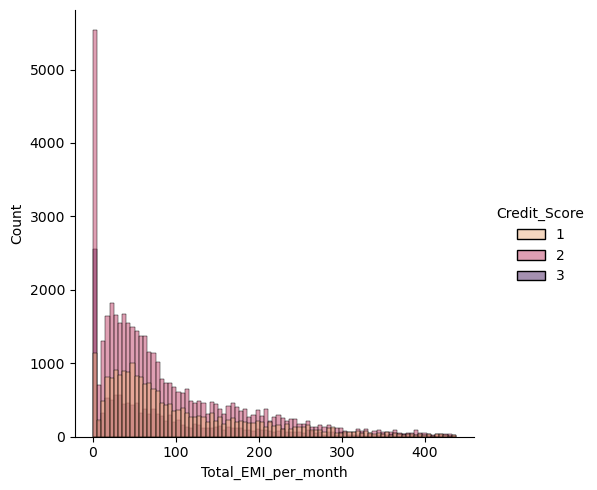

In [79]:
#Notice, due to max limits of jupyter, 
#['Monthly_Balance' , 'Amount_invested_monthly' and' Num_of_Delayed_Payment']
#These three columns are not presenting here.

for col in['Annual_Income', 'Monthly_Inhand_Salary', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month']:
    plt.figure(figsize=(30,6))
    sns.displot(x=col,data=df_clean, hue='Credit_Score', palette=("flare"))
    plt.show()

## Transform dummy for two text columns, then reach final cleaned set

In [80]:
#We start to transform dummy for Occupation and Payment_Behaviour
#Dummy Encoding Occupation column
df_cleaned = pd.get_dummies(df_clean, prefix='Occupation', columns=['Occupation'], drop_first=False)

In [81]:
#Transform Payment_Behaviour
df_cleaned = pd.get_dummies(df_cleaned, prefix='Payment_Behaviour', columns=['Payment_Behaviour'], drop_first=False)

## Possible Column Select via corr_matrix

In [82]:
#Try to select columns by correlation_matrix
corr_matrix = df_cleaned.corr()
corr_matrix["Credit_Score"].sort_values(ascending=False)

Credit_Score                                          1.000000
Credit_Mix                                            0.475676
Credit_History_Age                                    0.380428
Monthly_Balance                                       0.251494
Amount_invested_monthly                               0.160160
Annual_Income                                         0.137989
Monthly_Inhand_Salary                                 0.134025
Age                                                   0.114152
Payment_Behaviour_High_spent_Large_value_payments     0.071040
Payment_Behaviour_High_spent_Medium_value_payments    0.042441
Credit_Utilization_Ratio                              0.033294
Month                                                 0.016467
Payment_Behaviour_High_spent_Small_value_payments     0.014787
Occupation_Doctor                                     0.010396
Occupation_Architect                                  0.009207
Occupation_Media_Manager                              0

In [83]:
# According to cor, we recommand to keep those informative columns avioding overfitting
informative_ones = np.abs(corr_matrix["Credit_Score"].sort_values(ascending=False))>0.1
corr_matrix["Credit_Score"][informative_ones]

Age                                                 0.114152
Annual_Income                                       0.137989
Monthly_Inhand_Salary                               0.134025
Num_Bank_Accounts                                  -0.344211
Num_Credit_Card                                    -0.293359
Interest_Rate                                      -0.451453
Num_of_Loan                                        -0.322348
Delay_from_due_date                                -0.419555
Num_of_Delayed_Payment                             -0.357246
Changed_Credit_Limit                               -0.173414
Num_Credit_Inquiries                               -0.401281
Credit_Mix                                          0.475676
Outstanding_Debt                                   -0.379167
Credit_History_Age                                  0.380428
Payment_of_Min_Amount                              -0.371915
Amount_invested_monthly                             0.160160
Monthly_Balance         

In [84]:
df_cleaned_selected = df_cleaned.loc[:,['Age','Annual_Income','Monthly_Inhand_Salary','Num_Bank_Accounts',
                                'Num_Credit_Card','Interest_Rate','Num_of_Loan','Delay_from_due_date',
                                'Num_of_Delayed_Payment','Changed_Credit_Limit','Num_Credit_Inquiries',
                                'Credit_Mix','Outstanding_Debt','Credit_History_Age',
                                'Payment_of_Min_Amount','Amount_invested_monthly','Monthly_Balance','Credit_Score']]
df_cleaned_selected.head(10)

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,6.5,11.27,4.0,2,809.98,22.08,0,81.699521,321.851976,3
2,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,6.5,11.27,4.0,2,809.98,22.25,0,81.699521,321.851976,3
3,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,6.5,11.27,4.0,2,809.98,22.33,0,81.699521,321.851976,3
4,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,6.5,11.27,4.0,2,809.98,22.42,0,81.699521,321.851976,3
5,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,6.5,11.27,4.0,2,809.98,22.50,0,81.699521,321.851976,3
6,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,6.5,11.27,4.0,2,809.98,22.58,0,81.699521,321.851976,3
8,28.0,34847.84,3037.986667,2.0,4.0,6.0,1.0,3.0,4.0,5.42,2.0,2,605.03,26.58,0,84.704001,466.071350,2
9,28.0,34847.84,3037.986667,2.0,4.0,6.0,1.0,3.0,4.0,5.42,2.0,2,605.03,26.67,0,84.704001,466.071350,3
10,28.0,34847.84,3037.986667,2.0,4.0,6.0,1.0,3.0,4.0,5.42,2.0,2,605.03,26.75,0,84.704001,466.071350,2
11,28.0,34847.84,3037.986667,2.0,4.0,6.0,1.0,3.0,4.0,5.42,2.0,2,605.03,26.83,0,84.704001,466.071350,3


In [85]:
df_cleaned.head(10)

,Customer_ID,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,CUS_0xd40,1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,6.5,11.27,4.0,2,809.98,27.935805,22.08,0,49.574949,81.699521,321.851976,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,CUS_0xd40,3,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,6.5,11.27,4.0,2,809.98,27.935805,22.25,0,49.574949,81.699521,321.851976,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,CUS_0xd40,4,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,6.5,11.27,4.0,2,809.98,27.935805,22.33,0,49.574949,81.699521,321.851976,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,CUS_0xd40,5,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,6.5,11.27,4.0,2,809.98,27.935805,22.42,0,49.574949,81.699521,321.851976,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
5,CUS_0xd40,6,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,6.5,11.27,4.0,2,809.98,27.935805,22.50,0,49.574949,81.699521,321.851976,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
6,CUS_0xd40,7,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,6.5,11.27,4.0,2,809.98,27.935805,22.58,0,49.574949,81.699521,321.851976,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
8,CUS_0x21b1,1,28.0,34847.84,3037.986667,2.0,4.0,6.0,1.0,3.0,4.0,5.42,2.0,2,605.03,33.302980,26.58,0,18.816215,84.704001,466.071350,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
9,CUS_0x21b1,2,28.0,34847.84,3037.986667,2.0,4.0,6.0,1.0,3.0,4.0,5.42,2.0,2,605.03,33.302980,26.67,0,18.816215,84.704001,466.071350,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
10,CUS_0x21b1,3,28.0,34847.84,3037.986667,2.0,4.0,6.0,1.0,3.0,4.0,5.42,2.0,2,605.03,33.302980,26.75,0,18.816215,84.704001,466.071350,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
11,CUS_0x21b1,4,28.0,34847.84,3037.986667,2.0,4.0,6.0,1.0,3.0,4.0,5.42,2.0,2,605.03,33.302980,26.83,0,18.816215,84.704001,466.071350,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [86]:
#recheck column types are all converted
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80102 entries, 0 to 98303
Data columns (total 43 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Customer_ID                                         80102 non-null  object 
 1   Month                                               80102 non-null  int64  
 2   Age                                                 80102 non-null  float64
 3   Annual_Income                                       80102 non-null  float64
 4   Monthly_Inhand_Salary                               80102 non-null  float64
 5   Num_Bank_Accounts                                   80102 non-null  float64
 6   Num_Credit_Card                                     80102 non-null  float64
 7   Interest_Rate                                       80102 non-null  float64
 8   Num_of_Loan                                         80102 non-null  float64
